In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import numpy as np

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [84]:
iris_data = pd.read_csv('train_iris.csv')
iris_test_data = pd.read_csv('test_iris.csv')

In [86]:
Y_train = iris_data.species
Y_test = iris_test_data.species

In [88]:
iris_data = iris_data.drop(['Unnamed: 0', 'species'], axis = 1)
iris_test_data = iris_test_data.drop(['Unnamed: 0', 'species'], axis = 1)

In [90]:
max_depth_values = range(1, 100)

In [92]:
scores_data = pd.DataFrame()

In [94]:
rs = np.random.seed(0)

In [96]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(iris_data, Y)
    train_score = clf.score(iris_data, Y_train)
    test_score = clf.score(iris_test_data, Y_test)

    mean_cross_val_score = cross_val_score(clf, iris_data, Y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]
                                   })
    scores_data = pd.concat([scores_data, temp_score_data])

In [98]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type',
                           value_name='score')

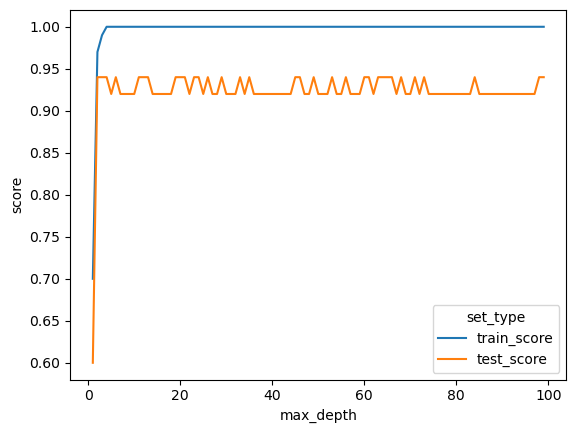

In [100]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

In [102]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,test_score,0.92
194,96,test_score,0.92
195,97,test_score,0.92
196,98,test_score,0.94


In [182]:
animals = pd.read_csv('dogs_n_cats.csv')

In [184]:
animals

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [186]:
Y_train_an = animals.Вид

In [219]:
animals_tr = animals.drop(['Вид'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(animals_tr, Y_train_an, test_size=0.33, random_state=42)

In [222]:
max_depth_values = range(1, 100)

In [224]:
scores_data = pd.DataFrame()

In [226]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]
                                   })
    scores_data = pd.concat([scores_data, temp_score_data])

In [227]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type',
                           value_name='score')

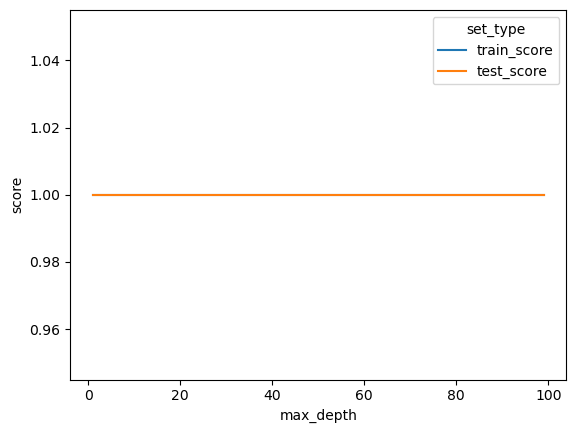

In [228]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

In [232]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0
...,...,...,...
193,95,test_score,1.0
194,96,test_score,1.0
195,97,test_score,1.0
196,98,test_score,1.0


In [203]:
#clf.predict(X_test)

In [234]:
test_data_dogs = pd.read_json('dataset_209691_15.json')

In [236]:
hh = clf.predict(test_data_dogs)

In [238]:
l = list(hh)
l.count('собачка')

58